### Problem statement - 1

In [1]:
# Loding data
import pandas as pd

tweets_df = pd.read_csv(r"C:\Users\setup\Desktop\Elon_musk.csv",
                       encoding='latin1', index_col='Unnamed: 0')

# Glance of data
tweets_df.head()

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [2]:
# Shape of data
tweets_df.shape

(1999, 1)

In [3]:
# Presence of null values
tweets_df.isnull().sum()

Text    0
dtype: int64

In [4]:
# Processing text
import re
from nltk.tokenize import word_tokenize
stop_words = pd.read_csv(r"C:\Users\setup\Desktop\stop.txt")

def data_processing(text):
    # Converting text to lower case
    text = text.lower()
    
    # Removing taggings and web addressess
    text = re.sub(r"https\S+|www\S+https\S+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|#','', text)
    text = re.sub(r'[^\w\s]','',text)
    
    # Tokenization
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in list(stop_words)]
    
    return " ".join(filtered)

tweets_df['Text'] = tweets_df['Text'].apply(data_processing)
tweets_df.head()

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge is underestimated
5,teslacn congratulations tesla china for amazin...


In [5]:
# Prsence of duplicates
tweets_df.duplicated().sum()

36

In [6]:
# Removing duplicates
tweets_df.drop_duplicates()

,Text
1,kunalb11 im an alien
2,id_aa_carmack ray tracing on cyberpunk with hd...
3,joerogan spotify great interview
4,gtera27 doge is underestimated
5,teslacn congratulations tesla china for amazin...
...,...
1995,flcnhvy true it sounds so surreal but the nega...
1996,ppathole make sure to read ur terms amp condit...
1997,teslagong ppathole samwise gamgee
1998,ppathole altho dumb and dumber is u0001f525u00...


In [7]:
# Adding polarity
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity


tweets_df['Polarity'] = tweets_df['Text'].apply(polarity)
tweets_df.head()

,Text,Polarity
1,kunalb11 im an alien,-0.250
2,id_aa_carmack ray tracing on cyberpunk with hd...,0.000
3,joerogan spotify great interview,0.800
4,gtera27 doge is underestimated,0.000
5,teslacn congratulations tesla china for amazin...,0.275


In [8]:
# Adding sentiment
def sentiment(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > 0:
        return 'Positive'


tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentiment)
tweets_df.head()

,Text,Polarity,Sentiment
1,kunalb11 im an alien,-0.250,Negative
2,id_aa_carmack ray tracing on cyberpunk with hd...,0.000,Neutral
3,joerogan spotify great interview,0.800,Positive
4,gtera27 doge is underestimated,0.000,Neutral
5,teslacn congratulations tesla china for amazin...,0.275,Positive


In [9]:
# Sentiments count
tweets_df['Sentiment'].value_counts()

Sentiment
Neutral     900
Positive    882
Negative    217
Name: count, dtype: int64

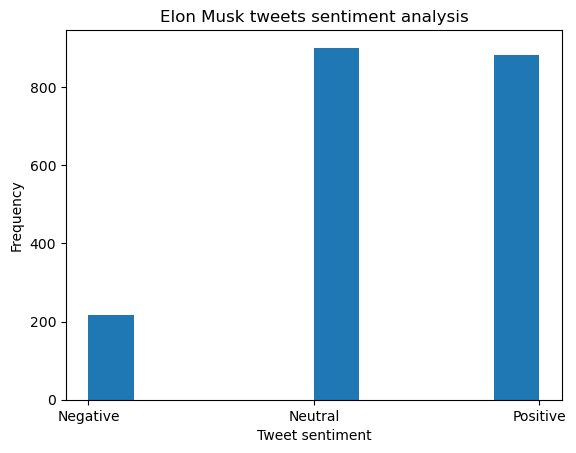

In [10]:
# Sentiments visualization
import matplotlib.pyplot as plt

plt.hist(data=tweets_df, x='Sentiment')
plt.title('Elon Musk tweets sentiment analysis')
plt.xlabel('Tweet sentiment')
plt.ylabel('Frequency')
plt.show()

In [11]:
tweets_df['Sentiment'].value_counts()

Sentiment
Neutral     900
Positive    882
Negative    217
Name: count, dtype: int64

In [12]:
900 / tweets_df['Sentiment'].count()

0.4502251125562781

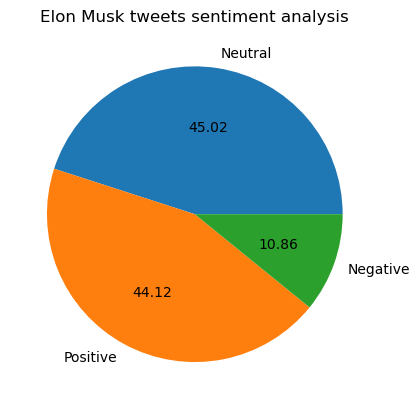

In [13]:

plt.pie(tweets_df['Sentiment'].value_counts(), labels=['Neutral', 'Positive', 'Negative'],
       autopct=lambda pct: round(pct, 2))
plt.title('Elon Musk tweets sentiment analysis')
plt.show()

### Problem statement - 2

In [14]:
# Fetching reviews from amazong site
import requests
from bs4 import BeautifulSoup

product = 'Echo (4th Gen, Black) combo with Amazon Smart Plug'
header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}

In [15]:
reviews = []
print('List of pages not responding - ')
for page in range(1, 25):
        url = 'https://www.amazon.in/Echo-Black-bundle-Amazon-Smart/product-reviews/B08K964H1C/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
        url = url + f'&pageNumber={page}'
        response = requests.get(url, headers=header)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html')
            div = soup.find('div', id='cm_cr-review_list')
            rev = div.find_all('span', class_='a-size-base review-text review-text-content')
            for r in rev:
                reviews.append(r.text)
        else:
            print(f'Page no - {page}', response)

List of pages not responding - 
Page no - 2 <Response [404]>
Page no - 3 <Response [404]>
Page no - 4 <Response [404]>


AttributeError: 'NoneType' object has no attribute 'find_all'

In [16]:
filtered_reviews = []
for review in reviews:
    text = review.strip()
    filtered_reviews.append(text)
filtered_reviews

['All in all its a very good product. The sound quality is superb,you will feel a hall effect, with crisp clear sound. Configuring the device with compatible other devices is flawless.But....but, please go through various news feed before you buy one. Because it was observed by Amazon that Alexa service is not doing buisness. Lack of profit from Alexa devices lead them to cut off employment. They are now inclined on more technically advanced AI based services and thinking negative about Alexa.',
 'Awesome performance when listening to music or audio from bluetooth. App works seamlessly when pairing or for requests, albeit a bit slow at times. Amazing entertainment value.Device does tend to have small glitches here and there like acknowledging a request but not playing the music. Aux has lower audio level than BT. Motion detection is a hit or miss. Controls the Fire TV stick quite well but faces sound glitches at times.',
 'After 2 years of use I can say its the best smart gadget of the

In [17]:
# Coverting reviews to datafram
import pandas as pd
reviews_df = pd.DataFrame(filtered_reviews, columns=['Product Review'])
reviews_df

,Product Review
0,All in all its a very good product. The sound ...
1,Awesome performance when listening to music or...
2,After 2 years of use I can say its the best sm...
3,The Echo Dot powered by Dolby is great!Sometim...
4,Good sound and alexa response very good. Happ...
5,Good but not able to connect via Bluetooth to ...
6,Excellent product amazing voice quality
7,Sound quality is better than JBL flip 5.Very g...
8,"Quality of sound is amazing, clear voice, musi..."
9,Excellent performance


In [18]:
# Processing text
import re
from nltk.tokenize import word_tokenize
stop_words = pd.read_csv(r"C:\Users\setup\Desktop\stop.txt")

def data_processing(text):
    # Converting text to lower case
    text = text.lower()
    
    # Removing taggings and web addressess
    text = re.sub(r"https\S+|www\S+https\S+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|#','', text)
    text = re.sub(r'[^\w\s]','',text)
    
    # Tokenization
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in list(stop_words)]
    
    return " ".join(filtered)

reviews_df['Product Review'] = reviews_df['Product Review'].apply(data_processing)
reviews_df.head()

,Product Review
0,all in all its very good product the sound qua...
1,awesome performance when listening to music or...
2,after 2 years of use i can say its the best sm...
3,the echo dot powered by dolby is greatsometime...
4,good sound and alexa response very good happy ...


In [19]:
# libraries required for sentiment analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [20]:
#Sentiment analysis using afinn
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [21]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
import spacy

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [22]:
# Adding sentiment
def sentiment(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > 0:
        return 'Positive'

In [23]:
# Reviews wise emotion value
reviews_df['Sentiment value'] = reviews_df['Product Review'].apply(calculate_sentiment)
reviews_df['Emotion'] = reviews_df['Sentiment value'].apply(sentiment)

In [24]:
reviews_df

,Product Review,Sentiment value,Emotion
0,all in all its very good product the sound qua...,1,Positive
1,awesome performance when listening to music or...,6,Positive
2,after 2 years of use i can say its the best sm...,7,Positive
3,the echo dot powered by dolby is greatsometime...,0,Neutral
4,good sound and alexa response very good happy ...,9,Positive
5,good but not able to connect via bluetooth to ...,-1,Negative
6,excellent product amazing voice quality,7,Positive
7,sound quality is better than jbl flip 5very go...,3,Positive
8,quality of sound is amazing clear voice music ...,14,Positive
9,excellent performance,3,Positive


In [25]:
# Overall review of product
print('Overall review of product: ', product)
value = reviews_df['Sentiment value'].mean()
if value > 0:
    print(f'Sentiment value: {value} and Emotions of users: Positive.')
elif value == 0:
    print(f'Sentiment value: {value} and Emotions of users: Neutral.')
elif value < 0:
    print(f'Sentiment value: {value} and Emotions of users: Negative.')
else:
    print('None')    

Overall review of product:  Echo (4th Gen, Black) combo with Amazon Smart Plug
Sentiment value: 4.9 and Emotions of users: Positive.


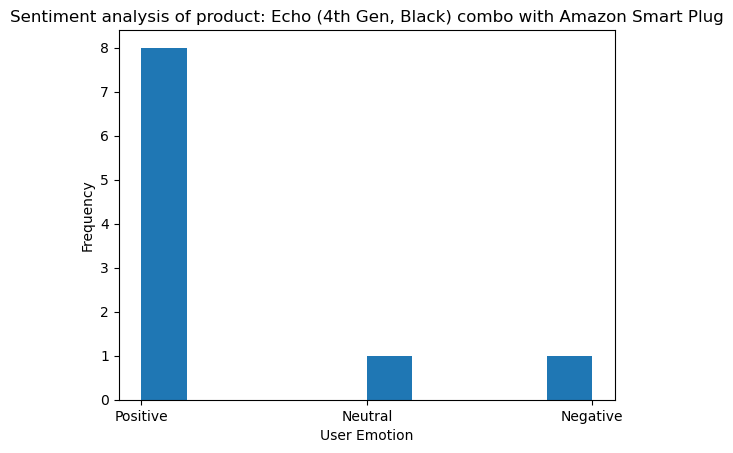

In [26]:
# Visualisation of Emotions
plt.hist(data=reviews_df, x='Emotion')
plt.title(f'Sentiment analysis of product: {product}')
plt.xlabel('User Emotion')
plt.ylabel('Frequency')
plt.show()

In [27]:
reviews_df['Emotion'].value_counts()

Emotion
Positive    8
Neutral     1
Negative    1
Name: count, dtype: int64

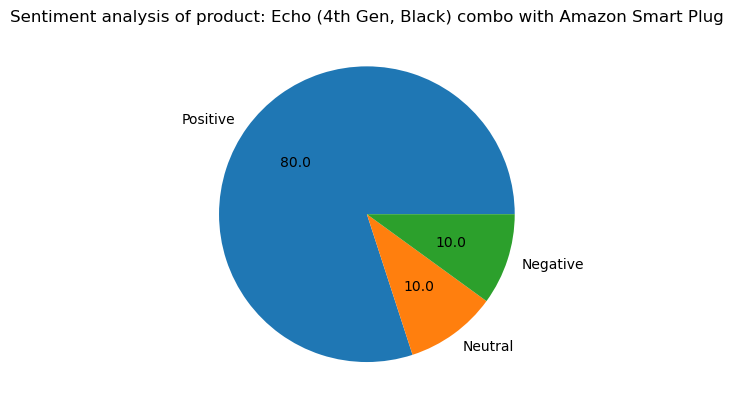

In [28]:
plt.pie(x=reviews_df['Emotion'].value_counts(), data=reviews_df['Emotion'], 
        labels=['Positive', 'Neutral', 'Negative'], autopct=lambda pct: round(pct, 2)) 
plt.title(f'Sentiment analysis of product: {product}')
plt.show()